# STUDENT SCORE AND STUDY HOURS


In [145]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [146]:
#Import dataset
df=pd.read_excel("studentscore.xlsx")


In [147]:
#Display the dataset
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Independent variable (x) is Hours and dependent variable (y) is Scores


### Exploratory Data Analysis

In [148]:
#shape of the dataset
df.shape

(25, 2)

In [149]:
#datatypes
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [150]:
#nullvalue check
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

###### There is no null values in the dataset

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [152]:
#descriptive statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#####  From the 75% and max values, we can assume that there are no outliers in the dataset

<AxesSubplot:>

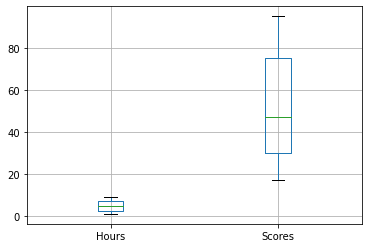

In [153]:
df.boxplot()

### Correlation

In [154]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##### Strong correlatin between two variables ,Hours and Scores. Positive correlation

C:\Users\server\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

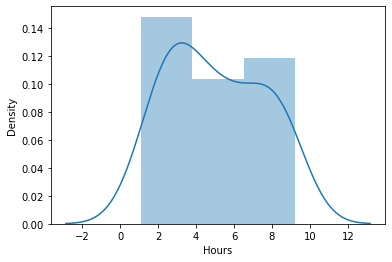

In [155]:
#Histogram- Hours
import seaborn as sns
sns.distplot(df["Hours"])

C:\Users\server\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

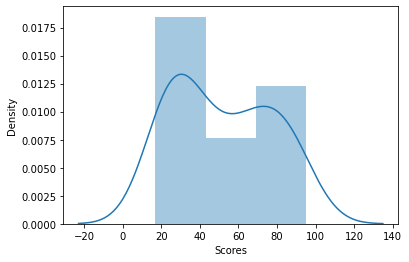

In [156]:
#Histogram-Scores
import seaborn as sns
sns.distplot(df["Scores"])

<function matplotlib.pyplot.show(close=None, block=None)>

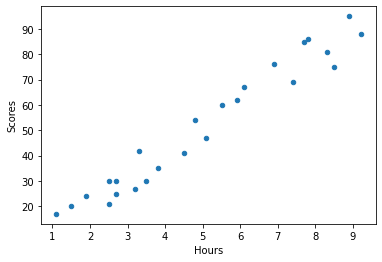

In [157]:
#Scatter plot
df.plot(kind="scatter",x="Hours",y="Scores")
plt.show

#####  linear positive relationship between x and y

## Fitting a linear regression model


In [158]:
import statsmodels.formula.api as smf
model1=smf.ols("Scores~Hours",data=df).fit()

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

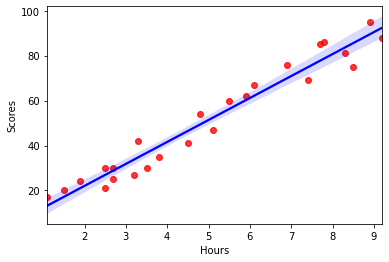

In [159]:
#Regression plot -  Best fit line
sns.regplot(x="Hours",y="Scores",data=df,scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [160]:
#Coefficients- slope and intercept
model1.params

Intercept    2.483673
Hours        9.775803
dtype: float64

##### Y = B0+B1X is the regression line equation ,Here B0=2.483673 and B1=9.775803

In [161]:
###### confirmation of B1 ≠ 0 (to check whether the slope is statistically significant or not) - Hypothesis test
###### t and p values
print(model1.tvalues,'\n',model1.pvalues)

Intercept     0.981044
Hours        21.582931
dtype: float64 
 Intercept    3.367785e-01
Hours        9.132624e-17
dtype: float64


##### H0 is B1 =0 and Ha is B1 ≠ 0
##### pvalue<0.05 reject H0 and pvalue>0.05 accept H0
##### Here pvalue is less than 0.05 so reject H0 ,means there is a statistically significant slope in the regression plot

In [162]:
#Coefficient of determination 
#R2 and Adjusted R2 values
(model1.rsquared,model1.rsquared_adj)

(0.9529481969048356, 0.9509024663354806)

In [163]:
##### R2 value is nearly 1.so the regressin equation is an excellent one

In [164]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           9.13e-17
Time:                        09:39:23   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Prediction - What will be the predicted score if a student studies for 9.25 Hours per day



In [165]:
#Create a new dataframe
new_df=pd.Series([9.25])
new_df

0    9.25
dtype: float64

In [166]:
#create a dataframe with column name Hours
df_pred=pd.DataFrame(new_df,columns=(["Hours"]))
df_pred

,Hours
0,9.25


In [167]:
#prediction
model1.predict(df_pred)

0    92.909855
dtype: float64

# Score of the student who studies more than 9.25 hours will be 92.9

## RMSE

In [171]:
pip install ml_metrics

Note: you may need to restart the kernel to use updated packages.


In [172]:
from ml_metrics import rmse

In [176]:
pred=model1.predict(df)
pred.head()

0    26.923182
1    52.340271
2    33.766244
3    85.578002
4    36.698985
dtype: float64

In [177]:
rmse(pred,df.Scores)

5.374265578592619

###### LOW RMSE, SO MODEL IS GOOD


In [179]:
pred1=pd.DataFrame(pred,columns=(["Pred_Score"]))
pred1.head()

,Pred_Score
0,26.923182
1,52.340271
2,33.766244
3,85.578002
4,36.698985


#### compare actual and predicted Scores

In [180]:
pd.concat([df, pred1], axis=1)

,Hours,Scores,Pred_Score
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985
5,1.5,20,17.147378
6,9.2,88,92.421065
7,5.5,60,56.250592
8,8.3,81,83.622842
9,2.7,25,28.878343
